# Проверка гипотез по увеличению выручки в интернет-магазине. Oценка результатов А/В-теста

Исследование для крупного интернет-магазина.

Отдел аналитики вместе с отделом маркетинга подготовили список гипотез для увеличения выручки. Необходимо выбрать наиболее приоритетную.Информация находится в файле hypothesis.csv и  предоставлена для изучения.

Был проведен А/В-тест и получены результаты, которые нужно проанализировать. Информация с данными находится в файлах orders.csv и visitors.csv  и также предоставлена для изучения.

*Таким образом в данной работе постараемся выполнить две задачи:*
 
 первая - **приоритизация гипотез**
 
 вторая - **анализ результатов А/В-теста**


Исследование пройдет по следующим этапам

 - изучение данных из файла, обзор данных, подготовка данных к анализу
 - исследовательский анализ данных
   - 1 часть - приоритизация гипотез
   - 2 часть - анализ А/В теста

## Изучение общей информации

- Загрузим необходимые библиотеки. Прочитаем файлы. Опишем данные.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis['Hypothesis'].value_counts() # получили описание

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                 

 - В таблице 9 строк с информацией о 9 гипотезах. Все значения по колонке `Hypothesis` уникальные. Пропущенных значений в столбцах с оценками нет.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


 - В таблице `orders` пропущенных значений нет, количество строк во всех столбцах одинаковое. Преобразуем данные о времени. сделаем проверку на дубликаты

In [7]:
orders['date'] = pd.to_datetime(orders['date'])  # изменим тип данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
orders.duplicated().sum()

0

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


 - Количество строк во всех колонках одинаковое, пропусков нет. Изменим формат даты. Сделаем проверку на дубликаты

In [11]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
visitors.duplicated().sum()

0

### Вывод

Мы изучили предоставленные таблицы:
 - информацио о гипотезах
 - информацию о заказах
 - информацию о визитах
 
Во всех таблицах нет пропусков в данных 

В таблицах `orders` `visitors` преобразовали данные о времени для дальнейших расчетов

Проверили описание данных методом `value_counts()` в колонке с названием гипотез. Аномалий в названиях не выявли.

Дубликатов не обнаружили


## Исследовательский анализ данных

### Приоритизация гипотез

Протестировать все гипотезы по улучшению бизнес-показателей сложно. Поэтому выбирают лучшую - приоритетную гипотезу. В данной работе используем наиболее популярные  способы приоритизации `ICE` и `RICE`



In [13]:
pd.options.display.max_colwidth = 120
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


 - Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем по убыванию приоритета

In [14]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2) 

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


 - Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем по убыванию приоритета

In [15]:
hypothesis['RICE'] = hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']/ hypothesis['Efforts'] 
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False) 

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*Вывод*

По результатам применения способа `ICE` топ-3 занимают гипотезы в высоким `Impact` - оценка влияния изменнений на пользователя, его опыт и удовлетворение от продукта. Высоким показателем `Confidence` - наша уверенность, что изменения повлияют именно так. И относительно невысоком `Efforts` - сколько стоит протестировать гипотезу.

Добавление в расчеты параметра `Reach`, охват пользователей, для расчета `RICE` полностью изменило расстановку приоритетов. Первые два места заняли гипотезы, у которых при высоких показателях `Impact` и `Confidence`, Reach также оказался самым высоким - для первого места 10 баллов для второго 8 баллов.

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" с первого  места опустилась на пятое при использовании `RICE`, именно из-за низкой `Reach` - один балл. Гипотеза "Добавить два новых канала привлечения трафика" смогла остаться в топе-3, при невысокой `Reach` в 3 балла, потеряв одну позицию из-за максимальной `Impact`, высокой `Confidence`, и средних затратах `Efforts`.

### Анализ А/В-теста

Перед тем, как приступать к анализу, изучим данные детальнее, а именно определим:
    
- сколько у нас групп в АВ-тесте;
- даты начала и окончания теста;
- сколько пользователей в каждой группе - по таблице с заказами;
- не попадают ли какие-то пользователи в обе группы - по таблице с заказами.


In [16]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [18]:
print('Дата начала А/В-теста  ', orders['date'].min())
print('Дата окончания А/В-тестa  ', orders['date'].max())

Дата начала А/В-теста   2019-08-01 00:00:00
Дата окончания А/В-тестa   2019-08-31 00:00:00


In [19]:
double = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1')
orders = orders[~orders['visitorId'].isin(double.index)]
print(orders['group'].value_counts())

B    548
A    468
Name: group, dtype: int64


Комментарий

 - Две группы учавствуют в А/В-тесте.  
 - Тест длится в течении месяца с 1 по 31 августа 2019 года
 - Исключили пользователей, попадающих в обе группы

*На основе датафреймов orders и visitors, полученных в рамках А/В-тестирования создадим таблицу с колонками для каждой группы на определенную дату*

 - количество заказов 
 - сумма заказов
 - количество визитов
 - кумулятивное число заказов
 - кумулятивная сумма заказов
 - кумулятивное число визитов
 

In [20]:
# по таблице visitors  выберем строки для группы А, перименуем колонки, определим количество визитов на определенную дату

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

 # нашли кумулятивное число визитов на определенную дату
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# по таблице visitors  выберем строки для группы В, перименуем колонки, определим количество визитов на определенную дату

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# по таблице orders выбрали строки для группы А 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)  # сгруппировали по дате
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})  # посчитали число заказов и выручку
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# посчитали кумулятивное число заказов и кумулятивную выручку
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# по таблице orders выбрали строки для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False) # сгруппировали по дате
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})  # посчитали число заказов и выручку
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# посчитали кумулятивное число заказов и кумулятивную выручку
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединили получившиеся таблицы в одну по полю date
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Чтобы исключить проблему подсматривания, анализируют графики метрик. Для изучения кумулятивных данных, построим графики

 - кумулятивной выручки по группам
 
 - кумулятивного среднего чека по группам
 - относительного изменения кумулятивного средненго чека группы В к группе А
 - кумулятивной конверсии по группам
 - относительного изменения кумулятивной конверсии группы В к группе А

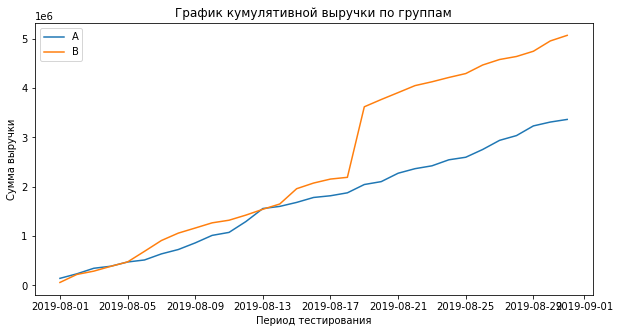

In [21]:
# построим график кумулятивной выручки по группам
plt.figure(figsize=(10,5))  
plt.plot(data['date'], data['revenueCummulativeA'], label = 'A')
plt.plot(data['date'], data['revenueCummulativeB'], label = 'B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Сумма выручки')
plt.xlabel('Период тестирования');

Комментарий

 - Выручка равномерно увеличивается в обеих группах, примерно, до середины теста. Далее в группе В произошел резкий скачок вверх. Возможно, влияние заказов с большой стоимостью или числом заказов у одного пользователя.

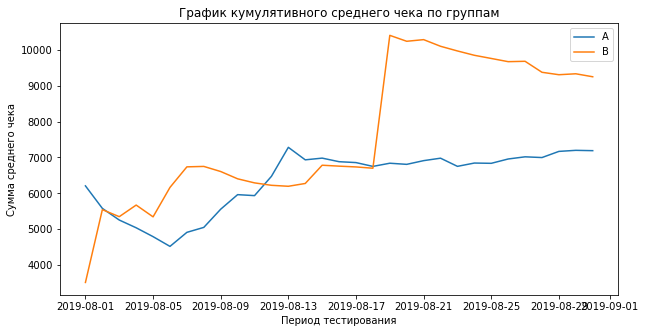

In [22]:
# построим график кумулятивного среднего чека по группам
plt.figure(figsize=(10,5))
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label ='A')
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label ='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Период тестирования');

Комментарий

 - Для группы А значение среднего чека росло, потом зафиксировалось. Средний чек для группв В сначала теста был выше. Потом резкий ввзлет в значениях, влияние выбросов, и небольшое снижение. К окончанию теста показатель среднего чека для обеих групп выровнялся и зафиксировался небольшим снижением. Необходим дополнительный анализ выбросов для данной метрики.

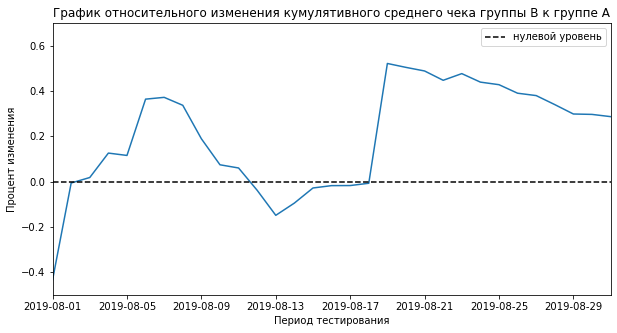

In [23]:
# построим график относительного изменения среднего чека группы В к группе А
plt.figure(figsize=(10,5))
plt.plot(data['date'], (data['revenueCummulativeB'] / data['ordersCummulativeB']) / 
         (data['revenueCummulativeA'] / data['ordersCummulativeA']) - 1)

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--', label='нулевой уровень')
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.7])
plt.legend()
plt.ylabel('Процент изменения')
plt.xlabel('Период тестирования');

Комментарий

 - На динамику средненго чека в группе В сильно влияют крупные заказы. После резкого первого подъема зафиксировано снижение. Но после второго скачка вверх снижение уже не такое сильное, как в первый раз. Оно останавливается и выравнивается к финалу теста

In [24]:
print(data['date'].min())   # рассчитали значение для оси Х
print(data['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [25]:
(data['ordersCummulativeA'] / data['visitorsCummulativeA']).max() # рассчитали значение для максимального параметра для оси Y

0.03577235772357724

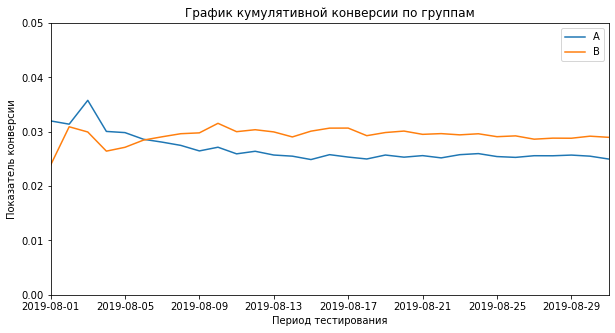

In [26]:
# построим график кумулятивной конверсии по группам
plt.figure(figsize=(10,5))
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label = 'A')
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label = 'B')
plt.title('График кумулятивной конверсии по группам')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])  # задали масштаб осей
plt.ylabel('Показатель конверсии')
plt.xlabel('Период тестирования');   

Комментарий

Конверсия для группы В стабильно выше, практически на протяжении всего теста. Небольшое преимущество есть у группы А в самом начале. Потом  конверсия группы В выравнивается и фиксируется в постоянном значении - большем, чем у группы А

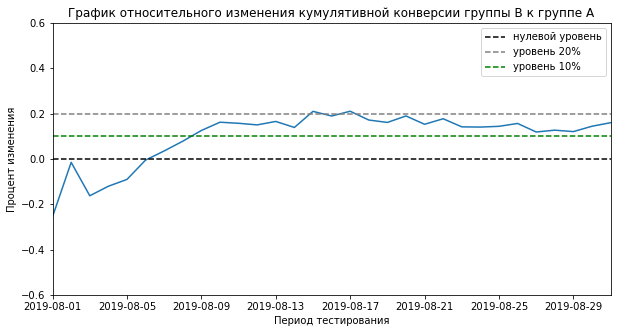

In [27]:
# построим график относительного изменения конверсии группы В к группе А
plt.figure(figsize=(10,5))
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB']) /
        (data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1)

plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--', label='нулевой уровень')
plt.axhline(y=0.2, color='grey', linestyle='--', label='уровень 20%')
plt.axhline(y=0.1, color='green', linestyle='--', label='уровень 10%')
plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6])
plt.legend()
plt.ylabel('Процент изменения')
plt.xlabel('Период тестирования');

Комментарий

 - Почти с самого начала теста группа В лидирует по конверсии. В отдельные периоды показатель в группе В был лучше на 20 %, чем в группе А. Отметка   показателя лучшей конверсии  в 10% для группы В продержалась, практически, на протяжении всего теста


Для верной оценки итогов А/В -теста необходимо исключить аномалии, редкие выбивающиеся значения, которые могут исказить результат. В данной работе мы исключим заказы с наибольшими суммами и пользователей с редким большим числом заказов.
 
Чтобы исключить такие значения посчиатем 95 и 99 перцентили количества заказов на пользователя и стоимости заказов.

Построим точечный график количества заказов на пользователя и точечный график стоимостей заказов
 

In [28]:
#сгруппируем по пользователю и посчитаем количество заказов

ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
.agg({'transactionId' : 'nunique',})

ordersByUsers.columns = ['visitorId', 'orders']   # переименуем колонки
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


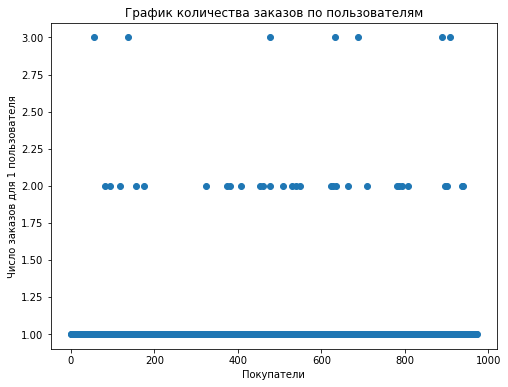

In [29]:
# построим график количества заказов по пользователям
plt.figure(figsize=(8, 6))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Число заказов для 1 пользователя')
plt.xlabel('Покупатели')
plt.title('График количества заказов по пользователям');

In [30]:
np.percentile(ordersByUsers['orders'], [95, 99])   # считаем перцентили

array([1., 2.])

Комментарий
 - Не более 5% пользователей сделали больше 1 заказов, не более 1% больше 2. Офильтруем по 95 перцентилю

In [31]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

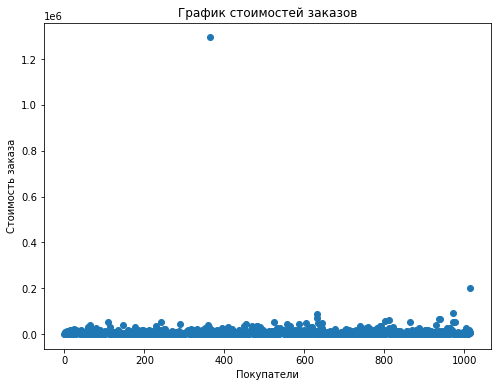

In [32]:
#  построим график растределения стоимостей заказов
plt.figure(figsize=(8, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('График стоимостей заказов')
plt.xlabel('Покупатели')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue']);

In [33]:
orders['revenue'].max() # нашли максимальное значение для выручки

1294500

In [34]:
m = orders['revenue'].max()
order_mid = orders.query('revenue < @m') # сделали срез
order_mid['revenue'].max()

202740

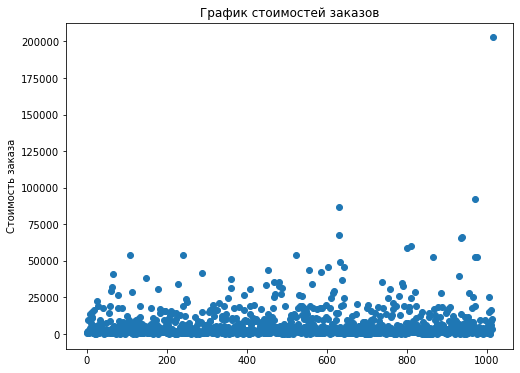

In [35]:
#  построим график растределения стоимостей заказов
plt.figure(figsize=(8, 6))
x_values = pd.Series(range(0, len(order_mid['revenue'])))
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, order_mid['revenue']);

In [36]:
np.percentile(orders['revenue'], [95, 99]) # считаем перцентили по стоимости

array([26785., 53904.])

Комментарий
 - Не более чем у 5% заказов чек дороже 26785 рублей, и не более чем у 1% дороже - 53904 рублей. Офильтруем по 95 перцентилю.
 

 -  *Отфильтруем данные и посчитаем*
  
    -  статистическую значимость различий в конверсии между группами по "сырым данным"
    
    -  статистическую значимость различий в в среднем чеке заказа между группами по "сырым данным"
    
    -  статистическую значимость различий в конверсии между группами по "очищенным данным"
    
    -  статистическую значимость различий в в среднем чеке заказа между группами по "очищенным данным"

In [37]:
 # создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders'], 
 # в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [38]:
# подготовим выборки к проверке критерием Манна-Уитни
# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# тем, кто ничего не заказывал, будут соответствовать нули

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum()\
                                                                - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum()\
                                                                - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)


 - Проверим статистическую значимость различия конверсии между группами 
 
 Нулевая гипотеза: различий в конверсии между группами нет
 
 Альтернативная гипотеза: различия в конверсии между группами есть
 
 Зададим число `alpha` равное `0.05`
 
 Применим тест `Манна-Уитни`
 
 
 - Дополнительно посчитаем относительное различие в конверсии между группами

In [39]:
print('Число pvalue  {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в конверсии  {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Число pvalue  0.011
Относительное различие в конверсии  0.160


Комментарий

- Число pvalue меньше числа alpha, значит отвергаем гипотезу о равенстве. По сырым данным между совокупностями есть статистически значимая разница. Группа В, выигрывает в относительной конверсии у группы А 16%




*Теперь проверим статистическую разницу в среднем чеке между сегментами "по сырым данным"*

Нулевая гипотеза: различий по среднему чеку между группами нет

Альтернативная гипотеза: различия в среднем чеке между группами есть.

Число `alpha` равно `0.05`, применим тест `Манна-Уитни`

- *Дополнительно рассчитаем относительный прирост среднего чека группы В*

In [40]:
print('Число pvalue  {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue']\
                                                        , orders[orders['group'] == 'B']['revenue'])[1]))

print('Относительное различие по среднему чеку  {0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()
                                                                / orders[orders['group'] == 'A']['revenue'].mean() - 1))

Число pvalue  0.829
Относительное различие по среднему чеку  0.287


Комментарий

- Рvalue больше 0,05 - статистически значимых отличий между выборками нет. Однако, средний чек в группе В почти на 29% выше, чем в средний чек в группе А. Скорее всего, на показатель влияниет попадание в выборку  заказов с высокой стоимостью.



 - *Следующим шагом рассчитаем метрики по "очищенным данным"*

In [41]:
# отфильтруем заказы со стоимостью болшьше 28000 рублей и пользователей сделавших более 2 заказов

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]\
                                 
 ['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId']], axis = 0)


usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId'] 


abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates() # объединим таблицы
                .sort_values())

abnormalUsers.head()

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

In [42]:
#  подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             
                             pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       
                                       name = 'orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
                                                           
                            .isin(abnormalUsers))]['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateB']\
                                                                                             
                                     .sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis=0)


In [43]:
print('Число pvalue  {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в конверсии  {0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Число pvalue  0.016
Относительное различие в конверсии  0.174


Комментарий

- `pvalue` меньше `alpha` - статистическая значимость достигнута и для очищенных данных. Относительная конверсия сегмента В лучше конверсии сегмента А на 17%. Этот показатель стал больше на 1 процентный пункт в сравнении с конверсией по сырым данным



*Изучим результаты по среднему чеку*

In [44]:
print('Число pvalue {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                
         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',
                                                                
             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительное различие по среднему чеку {0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',
                                
                                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                       
                      / orders[np.logical_and(orders['group'] == 'A',
                                              
                       np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


Число pvalue 0.727
Относительное различие по среднему чеку -0.034


Комментарий

 - Не удалось зафиксировать статистическую разницу по очищенным данным. Изменилось относительное различие по среднему чеку. Теперь группа В проигрывает группе А  3 процента, а до очистки данных была лучше на 29%, хотя тест и не фиксировал статистически значимую разницу. Такое смещение показывает, как сильно аномалии влияют на результат. 



**Необходимо принять решение по результатам А/В-теста**

Факты следующие:

 - достигнута статистическая значимость в конверсии и для "сырых данных" и для отфильтрованных Группа В - постоянный лидер.
 
 - для среднего чека статистически значимая разница не была достигнута ни по сырым данным ни по очищщеным. На средний чек выбросы оказали сильное влияние. На относительном различии среднего чека между группами, мы это увидели
 
 - по графику относительного изменения среднего чека видим, после второго выброса снижение, гораздо более плавное, чем после первого и в финале линия выравнивается
 
 - график относительного изменения кумулятивной конверсии после некоторых колебаний начинает плавно расти. 

**Исходя из фактов, тест можно остановить и признать лидером группу В** 

Конверсия в группе В стабилизировалась на отметке более высокой, чем в группе А. По среднему чеку статистически значимых различий между группами не выявили. Но средний чек для сегмента В не хуже, чем для сегмента А. С ростом конверсии  будет расти и выручка (при том же среднем чеке)



## Вывод

Для данного иследования были предложены две задачи 

 - приоритизировать гипотезы
 - проанализировать результаты А/В-теста
 
Информация для исследования была представлена в таблицах 
 - со списком гипотез и оценками для первой задачи 
 - заказов и визитов по результатам А/В-теста для второй задачи
 
Пропусков, дубликатов, аномалий в данных не обнаружили. Для дальнейших расчетов преобразовали формат даты.


Гипотезы приоритизировали применяя фреймворки `ICE` и `RICE` Приоритизация рассчитывается с учетом параметров 
 - `Impact` - влияние изменений в продукте на пользователя
 - `Confidence` - наша уверенность, что изменения повлияют именно так
 - `Reach` - показывает скольких пользователей затронет изменение продукта
 - `Efforts` - показывает насколько сложно проверить гипотезу, сколько ресурсов потребуется

Компоненты оцениваются по шкале от 1 до 10 баллов. Соответственно, чем выше по оценкам первые три параметра и ниже четвертый, тем приоритетнее гипотеза.

Чтобы проанализировать результаты А/В-теста и принять решение остановить тест, зафиксировать результат или продолжить, выполнили следующие шаги

 - изучили данные по А/В-тесту. Отсеяли пользователей, попадающих в обе группы
 
 - рассчитали и построили графики кумулятивных метрик выручки, конверсии и среднего чека, а также график изменения кумулятивного среднего чека и график изменения кумулятивной конверсии. По графикам определили:
 
    - конверсия для группы В лидирует
    - в данных есть сильные выбросы - заказы на большую сумму или большое число заказов на одного пользователя
    
 - для наглядного изучения выбросов построили точечный график количества заказов по пользователям  и точечный график стоимостей
 
 - для того чтобы определить границу для аномальных пользователей и заказов, изучили 95 и 99 перцентили. Так мы решили отсеять 5 процентов пользователей и заказов.
 
 - посчитали статистическую значимость в конверсиях между группами и статистическую значимость различий в среднем чеке
 
    - по сырым даннам
    - по очищенным данным
    
Для расчета статистической значимости использовали непараметрический тест Манна-Уитни. Основное отличие непраметрических методов в том, что они работают с рангами, - номерами значений в упорядоченном ряду, - никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

По итогу анализа получили результаты

 - в конверсиии для сырых данных и для отфильтрованных есть статистически значимомго различие. Группа В лучше группы А на 16% по сырым данным, и на 17 % по отфильтрованным
 
 - по среднему чеку для каждой из групп тест не показал статистическую разницу как в варианте с сырыми данными, так и в варианте с очищенными данными, несмотря на то, что относительная разница в куммулятивном среднем чеке между группами была существенной. Для сырых данных средний чек для в группе В был лучше на 29%, чем в группе А. После удаления выбросов средний чек в группе В стал ниже на 3% среднего чека группы А. Заказы с высокой стоимостью в группе В оказали влияние на относительную разницу средних чеков по группам.
 
Учитывая статистически зафиксированную, положительную разницу в конверсии и отсутствие явных отрицательных отличий по среднему чеку, приняли решение остановить тест и зафиксировать победу группы В